#ZAD 1

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

Treść:

Proszę pobrać pliki set1.csv i set2.csv. Dla obu proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki i pokazać na rysunku jak przebiegła klasyfikacja w każdym wypadku. Dla drzew decyzyjnych, proszę narysować drzewa powstałe dla obu zbiorów.

Jaki algorytm sprawdzał się najlepiej?

In [3]:
# Data loading
data1 = pd.read_csv('set1.csv')
data2 = pd.read_csv('set2.csv')

x1 = data1[['-1.558', '-0.956']].to_numpy()
y1 = data1['0'].to_numpy()
x2 = data2[['0.194',  '-0.842']].to_numpy()
y2 = data2['0'].to_numpy()

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=1)

--------------------SET 1--------------------
dokładność na zbiorze testowym
1.0
dokładność na zbiorze uczącym
1.0


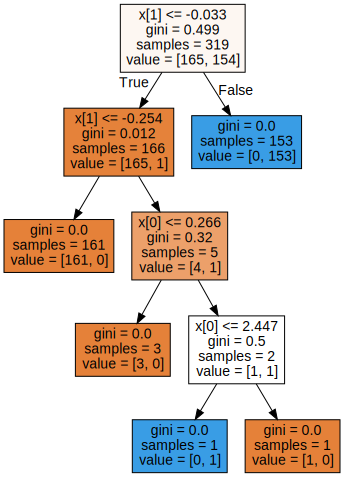

In [4]:
# Drzewa decyzyjne
model1 = DecisionTreeClassifier()
model2 = DecisionTreeClassifier()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print('--------------------SET 1--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test1, model1.predict(X_test1)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train1, model1.predict(X_train1)))
dot_decision_tree = tree.export_graphviz(model1, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

--------------------SET 2--------------------
dokładność na zbiorze testowym
0.9125
dokładność na zbiorze uczącym
1.0


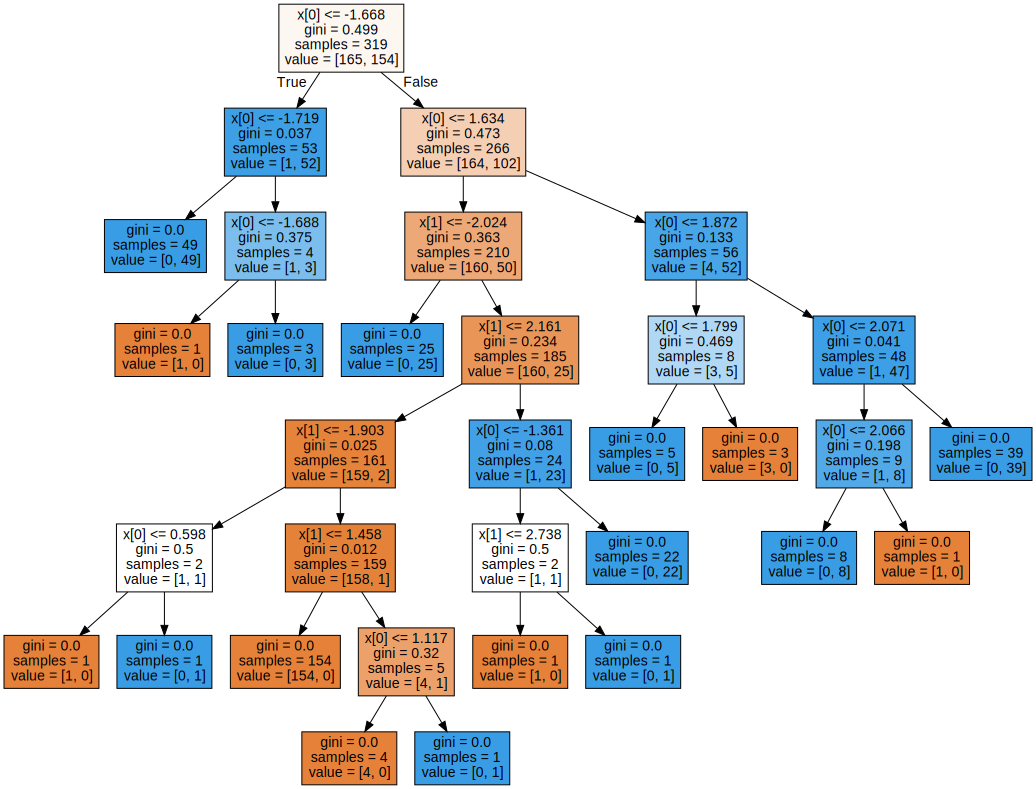

In [5]:
print('--------------------SET 2--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test2, model2.predict(X_test2)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train2, model2.predict(X_train2)))
dot_decision_tree = tree.export_graphviz(model2, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

In [6]:
# Lasy losowe
model1 = RandomForestClassifier()
model2 = RandomForestClassifier()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print('--------------------SET 1--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test1, model1.predict(X_test1)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train1, model1.predict(X_train1)))

print('--------------------SET 2--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test2, model2.predict(X_test2)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train2, model2.predict(X_train2)))

--------------------SET 1--------------------
dokładność na zbiorze testowym
1.0
dokładność na zbiorze uczącym
1.0
--------------------SET 2--------------------
dokładność na zbiorze testowym
0.9375
dokładność na zbiorze uczącym
1.0


In [7]:
# SVM
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(x1)
X_scaled2 = scaler.fit_transform(x2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.2, random_state=1)

model1 = SVC()
model2 = SVC()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print('--------------------SET 1--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test1, model1.predict(X_test1)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train1, model1.predict(X_train1)))

print('--------------------SET 2--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test2, model2.predict(X_test2)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train2, model2.predict(X_train2)))

--------------------SET 1--------------------
dokładność na zbiorze testowym
1.0
dokładność na zbiorze uczącym
0.9968652037617555
--------------------SET 2--------------------
dokładność na zbiorze testowym
0.975
dokładność na zbiorze uczącym
0.9905956112852664


In [8]:
# KNN
model1 = KNeighborsClassifier()
model2 = KNeighborsClassifier()

model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)

print('--------------------SET 1--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test1, model1.predict(X_test1)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train1, model1.predict(X_train1)))

print('--------------------SET 2--------------------')
print('dokładność na zbiorze testowym')
print(accuracy_score(y_test2, model2.predict(X_test2)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train2, model2.predict(X_train2)))

--------------------SET 1--------------------
dokładność na zbiorze testowym
0.9875
dokładność na zbiorze uczącym
0.9937304075235109
--------------------SET 2--------------------
dokładność na zbiorze testowym
0.9875
dokładność na zbiorze uczącym
0.987460815047022


Wnioski:

Drzewa decyzyjne:
W przypadku zbioru danych set1 drzewo decyzyjne osiągnęło doskonałą dokładność zarówno na zbiorze testowym, jak i uczącym, co sugeruje, że model jest zbyt złożony lub doskonale dopasowany do danych.
Dla zbioru danych set2 drzewo decyzyjne również osiągnęło wysoką dokładność na zbiorze uczącym, ale nieco niższą na zbiorze testowym, co sugeruje pewne przeuczenie modelu.

Lasy losowe:
Zarówno dla zbioru danych set1, jak i set2, lasy losowe osiągnęły bardzo wysoką dokładność na zbiorze testowym i uczącym. To sugeruje, że lasy losowe radzą sobie dobrze zarówno z prostymi, jak i bardziej złożonymi danymi.

SVM:
Dla zbioru danych set1 SVM osiągnął bardzo wysoką dokładność zarówno na zbiorze testowym, jak i uczącym.
Dla zbioru danych set2 SVM również osiągnął wysoką dokładność, choć trochę niższą niż dla set1.

KNN:
KNN osiągnął wysoką dokładność zarówno dla zbioru danych set1, jak i set2, zarówno na zbiorze testowym, jak i uczącym. Jednakże, w porównaniu do innych algorytmów, dokładność ta nie jest najwyższa.
Porównując skuteczność algorytmów:

Dla zbioru danych set1 wszystkie testowane algorytmy osiągnęły wysoką dokładność, ale drzewa decyzyjne wydają się być zbyt dopasowane do danych.
Dla zbioru danych set2 najlepszą skuteczność wykazały lasy losowe, osiągając najwyższą dokładność na zbiorze testowym i zachowując równocześnie niski poziom przeuczenia.

# ZAD 2

Treść:

Dla zbioru danych dotyczących raka piersi (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) proszę zaproponować klasyfikator oparty na każdym zaprezentowanym algorytmie oraz na sieci neuronowej wielowarstwowej (o zaproponowanej przez państwa strukturze). Proszę porównać wyniki.

Dodatkowo proszę o wykonanie wykresów zależności:

    dokładności klasyfikacji w zależności od ilości sąsiadów w algorytmie KNN

    dokładości klasyfikacji drzewa decyzyjnego w zależności od 3 dowolnych parametrów (przykładowo: max_depth, min_samples_split oraz min_samples_leaf).

    dokładności klasyfikacji lasu losowego w zależności od ilości drzew.

Co możemy wnioskować z zaprezentowanych wykresów? Czy wraz z wzrostem "complexity" algorytmu rośnie jego dokładność? W jaki sposób możemy to odnieść do zjawiska przeuczenia?

Jaki algorytm sprawdzał się najlepiej?

In [9]:
# Data loading

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


dokładność na zbiorze testowym
0.9473684210526315
dokładność na zbiorze uczącym
1.0


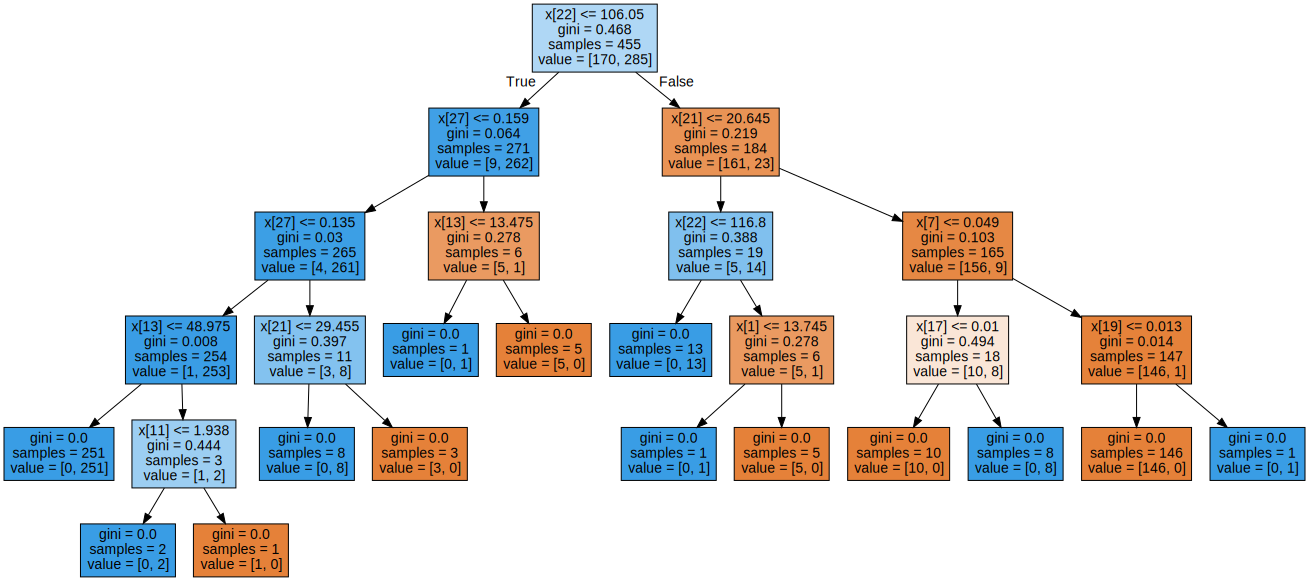

In [14]:
# Drzewa decyzyjne

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))
dot_decision_tree = tree.export_graphviz(model, out_file=None, filled=True)
decision_tree_plot = graphviz.Source(dot_decision_tree, format='png')
decision_tree_plot

In [15]:
# Lasy Losowe
model = RandomForestClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))

dokładność na zbiorze testowym
0.956140350877193
dokładność na zbiorze uczącym
1.0


In [18]:
# SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

model = SVC()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))

dokładność na zbiorze testowym
0.9736842105263158
dokładność na zbiorze uczącym
0.9868131868131869


In [19]:
# KNN
model = KNeighborsClassifier()

model.fit(X_train, y_train)

print('dokładność na zbiorze testowym')
print(accuracy_score(y_test, model.predict(X_test)))
print('dokładność na zbiorze uczącym')
print(accuracy_score(y_train, model.predict(X_train)))

dokładność na zbiorze testowym
0.956140350877193
dokładność na zbiorze uczącym
0.9846153846153847


Wnioski:

SVM osiągnął najwyższą dokładność na zbiorze testowym spośród testowanych modeli.
Drzewa decyzyjne oraz lasy losowe wykazują oznaki przeuczenia, co sugeruje, że mogą wymagać dalszej optymalizacji.

